In [136]:
import os
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 300

In [130]:
log_dir = "/home/fpga/Git/varro-test/logs/grid-search-2021-01-26"
log_files = [os.path.join(log_dir, filename) for filename in list(os.walk(log_dir))[0][2]]

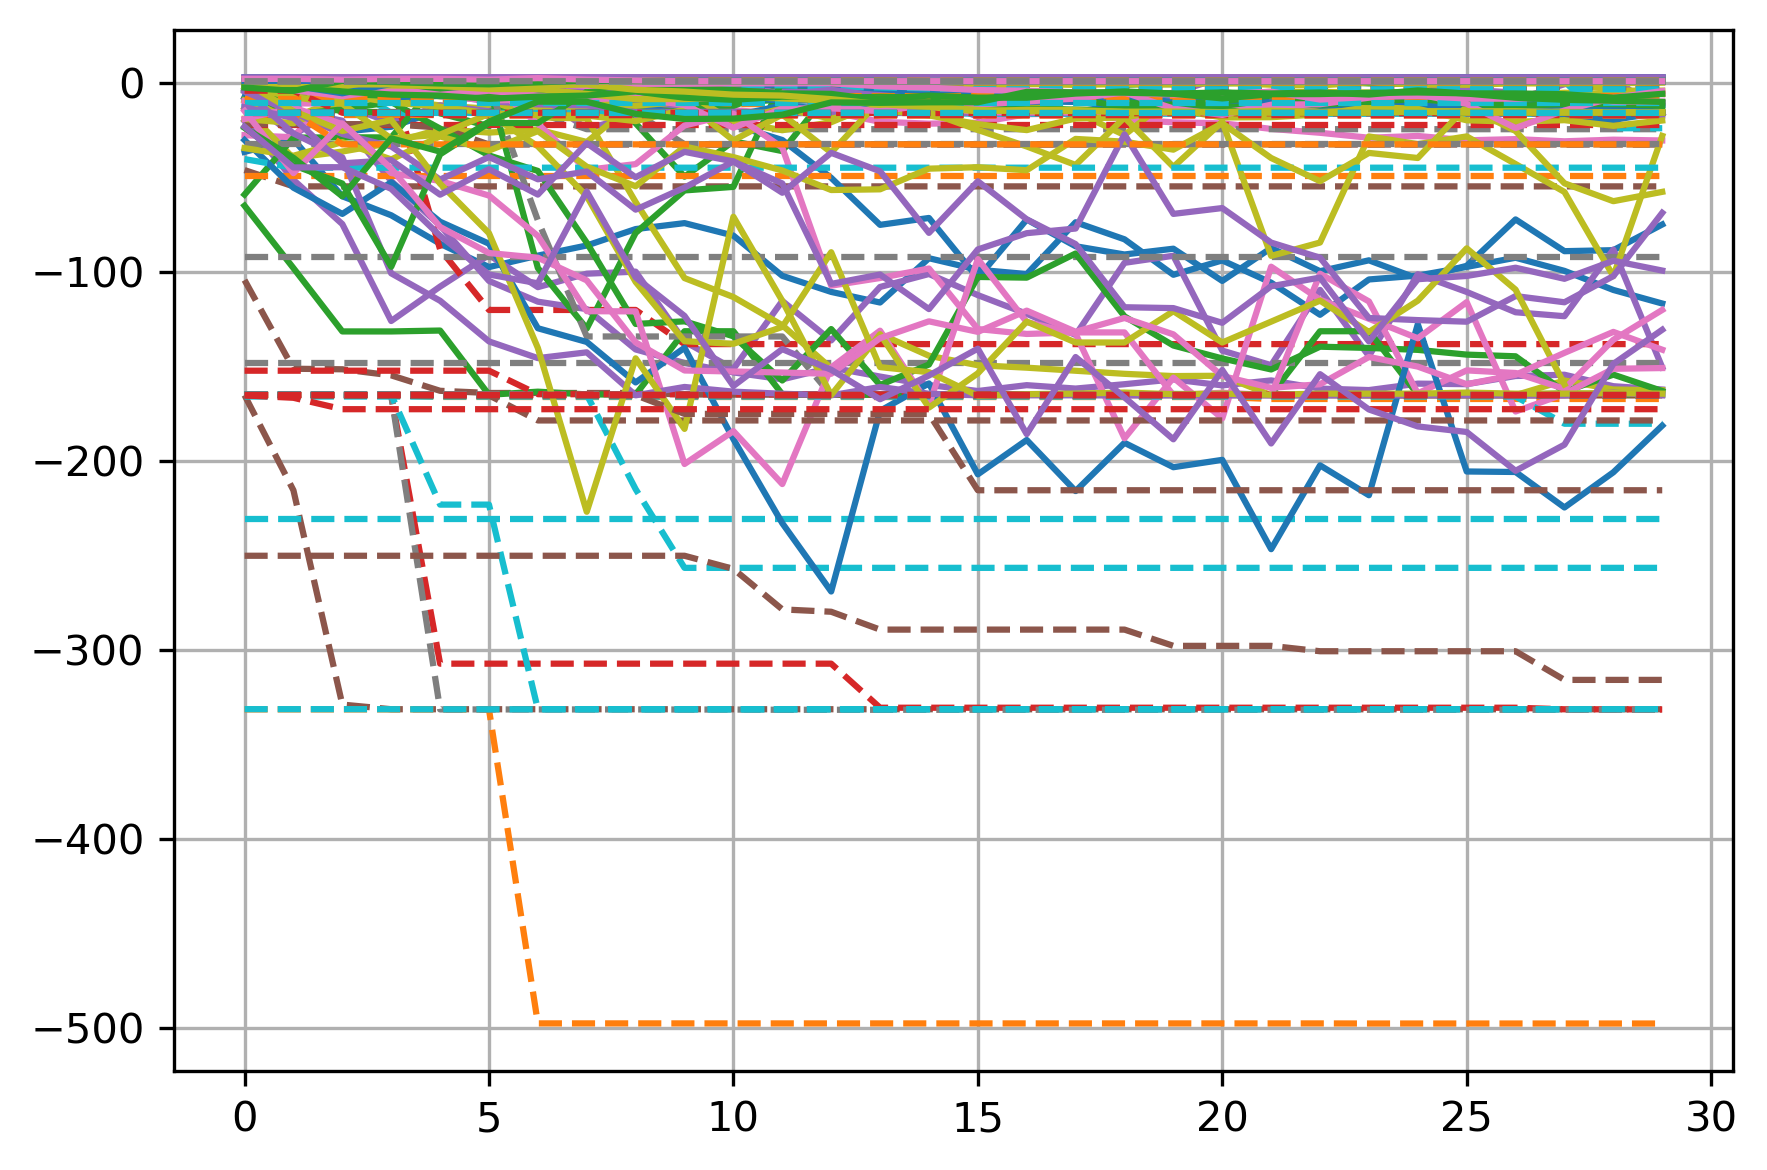

In [138]:
fig, ax = plt.subplots(1, 1)
log_losses_of_all_individuals = []
fitness_scores_dict = {log_file: {} for log_file in log_files}
for log_file in log_files:
    file = open(log_file, "r")
    losses = [line for line in file.read().splitlines() if ("loss" in line.lower()) | ("generation" in line.lower())]
    log_losses_of_all_individuals += [(log_file, float(data.split("|")[1].split(":")[1])) for data in losses if "log loss" in data.lower()]
    avg_fitness_scores, fittest_ind_scores = list(zip(*[(float(line.split("|")[-2].split(":")[-1]), float(line.split("|")[-1].split(":")[-1])) for line in losses if "fittest individual score" in line.lower()]))
    fitness_scores_dict[log_file]["avg_fitness_scores"] = avg_fitness_scores
    fitness_scores_dict[log_file]["fittest_ind_scores"] = fittest_ind_scores
    
    ax = plt.plot(avg_fitness_scores, linestyle="-")
    ax = plt.plot(fittest_ind_scores, linestyle="--")

    file.close()
    
plt.grid(True)
plt.show();

In [95]:
sorted(log_losses, key=lambda x: x[1])

[('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Feb-01-12:44:38.log',
  0.2951972680668552),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Feb-01-12:44:38.log',
  0.31664379758337646),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Feb-01-12:44:38.log',
  0.3453128579460378),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Jan-28-12:33:21.log',
  0.3468814318098663),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Jan-28-12:33:21.log',
  0.34688204161408553),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Jan-28-12:33:21.log',
  0.34690203922211776),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Jan-28-12:33:21.log',
  0.34690997258304124),
 ('/home/fpga/Git/varro-test/logs/grid-search-2021-01-26/simple_step_2021-Jan-28-12:33:21.log',
  0.3469301624381144),
 ('/home/fpga/Git/varro-test/logs/grid-searc

In [97]:
# file = open("./logs/varro/algo/experiments/simple_step_2021-Feb-01-12:44:38.log", "r")
# losses = [line for line in file.read().splitlines() if ("loss" in line.lower()) | ("generation" in line.lower())]
# log_loss_for_best_ind_run = [(log_file, float(data.split("|")[1].split(":")[1])) for data in losses if "log loss" in data.lower()]

# file.close()

In [98]:
[(loss, log_loss) if ("loss" in loss.lower()) & ("log loss" in log_loss.lower()) else for loss, log_loss in zip(losses[:-1], losses[1:])]

SyntaxError: invalid syntax (<ipython-input-98-adb7a926f306>, line 1)

In [99]:
log_loss_for_best_ind_run

[('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.979317517320369),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.6932420575258538),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  2.528280736816822),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.7501999086581927),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  2.729386029396607),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.9849114940252663),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  2.7594303806427836),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.5494770481861158),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.9792727301792402),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan-31-12:14:33.log',
  0.7502261957657169),
 ('./logs/varro/algo/experiments/simple_step_2021-Jan

In [100]:
log_loss_dict = {"0": [], "100": [], "1000": []}
for dirpath, dirnames, filenames in list(os.walk("./logs/varro/algo/TEMP"))[1:]:
    
    for log_file in filenames:
        log_file = os.path.join(dirpath, log_file)
        file = open(log_file, "r")
        losses = [line for line in file.read().splitlines() if ("loss" in line.lower()) | ("generation" in line.lower())]
        log_loss_dict[os.path.basename(dirpath)] += [(log_file, float(data.split("|")[1].split(":")[1])) for data in losses if "log loss" in data.lower()]

        file.close()

In [101]:
sorted(log_loss_dict["0"], key=lambda x: x[1])

[('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.2951972680668552),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.31664379758337646),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.3453128579460378),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.3508902649299577),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.350945267853598),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.37375205403363465),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.39552616696815157),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.40110983447184284),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.40662217468550965),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
  0.40662217768695486),
 ('./logs/varro/algo/TEMP/0/simple_step_2021-Feb-02-00:52:47.log',
  0.4066222628033036),
 ('./

In [102]:
sorted(log_loss_dict["100"], key=lambda x: x[1])

[('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-31-01:09:06.log',
  0.34693856768827674),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Feb-01-20:43:59.log',
  0.393408757991608),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Feb-01-20:43:59.log',
  0.39865215898353445),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.40783797552186307),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.40835269137892494),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.40913072794331046),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.40914814302603447),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.4098051491117646),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.41190179191142284),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.4131997930220731),
 ('./logs/varro/algo/TEMP/100/simple_step_2021-Jan-28-16:43:31.log',
  0.4

In [62]:
sorted(log_loss_dict["1000"], key=lambda x: x[1])

[('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.3468814318098663),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34688204161408553),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34690203922211776),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34690997258304124),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.3469301624381144),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34693027911372093),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.3469341841759589),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34693424710993076),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34693442538455255),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21.log',
  0.34694229911069685),
 ('./logs/varro/algo/TEMP/1000/simple_step_2021-Jan-28-12:33:21

---

In [65]:
import functools

In [69]:
top_5_best_hyperparam_files = set()
for x, y in sorted(log_loss_dict["0"], key=lambda x: x[1]):
    if len(top_5_best_hyperparam_files) <= 5:
        top_5_best_hyperparam_files.add(x)
    else:
        break

In [70]:
top_5_best_hyperparam_files

{'./logs/varro/algo/TEMP/0/simple_step_2021-Feb-01-12:44:38.log',
 './logs/varro/algo/TEMP/0/simple_step_2021-Feb-02-00:52:47.log',
 './logs/varro/algo/TEMP/0/simple_step_2021-Jan-28-14:38:13.log',
 './logs/varro/algo/TEMP/0/simple_step_2021-Jan-28-23:48:27.log',
 './logs/varro/algo/TEMP/0/simple_step_2021-Jan-29-16:34:23.log',
 './logs/varro/algo/TEMP/0/simple_step_2021-Jan-29-22:29:22.log'}

In [82]:
for log_file in top_5_best_hyperparam_files:
    
    file = open(log_file, "r")
    hyperparams = [tuple(map(str.strip, data.split("|")[1].split(":"))) for data in file.read().splitlines()[8:23]]
    print(hyperparams)
    file.close()

[('strategy', 'nsr-es'), ('problem_type', 'simple_step'), ('cxpb', '0.0'), ('mutpb', '1.0'), ('popsize', '30'), ('elitesize', '0.2'), ('ngen', '30'), ('imutpb', '0.001'), ('imutpb_decay', '0.99'), ('imutmu', '0'), ('imutsigma', '0.1'), ('lambda_penalty', '0.0'), ('halloffamesize', '0.2'), ('earlystop', 'False'), ('novelty_metric', 'hamming')]
[('strategy', 'nsr-es'), ('problem_type', 'simple_step'), ('cxpb', '0.0'), ('mutpb', '1.0'), ('popsize', '30'), ('elitesize', '0.2'), ('ngen', '30'), ('imutpb', '1e-05'), ('imutpb_decay', '0.95'), ('imutmu', '0'), ('imutsigma', '0.1'), ('lambda_penalty', '0.0'), ('halloffamesize', '0.2'), ('earlystop', 'False'), ('novelty_metric', 'hamming')]
[('strategy', 'sga'), ('problem_type', 'simple_step'), ('cxpb', '0.0'), ('mutpb', '1.0'), ('popsize', '30'), ('elitesize', '0.2'), ('ngen', '30'), ('imutpb', '0.0001'), ('imutpb_decay', '0.99'), ('imutmu', '0'), ('imutsigma', '0.1'), ('lambda_penalty', '0.0'), ('halloffamesize', '0.2'), ('earlystop', 'False')